In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from urllib.request import urlopen

In [65]:
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
resp = urlopen(url)

image = np.asarray(bytearray(resp.read()),dtype="uint8")

image = cv2.imdecode(image,cv2.IMREAD_COLOR)


image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [66]:
blurred_image =cv2.GaussianBlur(image_rgb, (5,5), 0)

In [67]:
average_blur = cv2.blur(image_rgb, (5,5))

In [68]:
median_blur = cv2.medianBlur(image_rgb, 5)


In [69]:
bilateral_blur = cv2.bilateralFilter(image_rgb, 9, 75,75)

In [70]:
alpha = 1.5
beta = 30
adjusted = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

In [71]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray_image)

In [72]:
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)


In [73]:
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)


In [74]:
edges = cv2.Canny(gray_image, 100, 200)


In [75]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
morph_open = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)


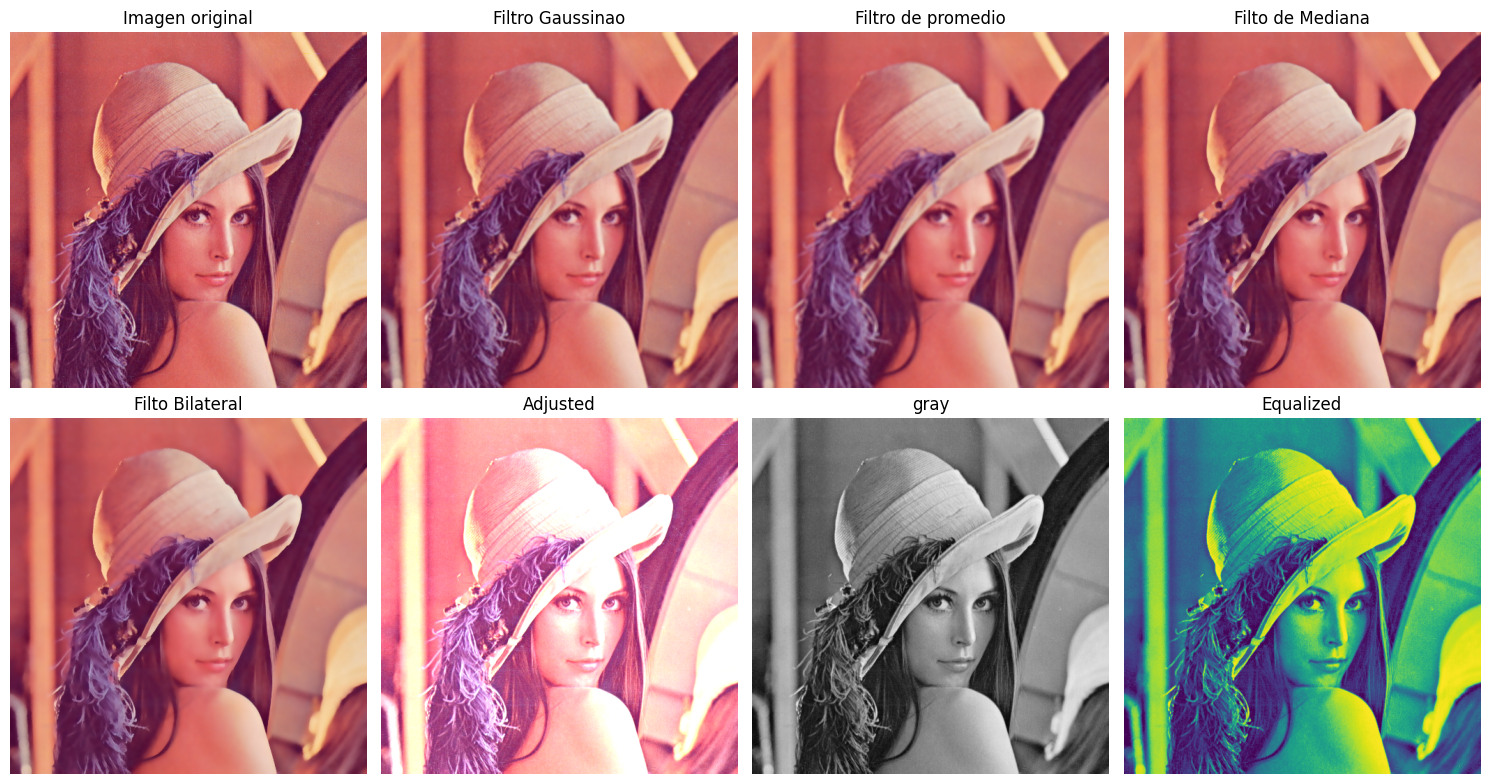

/tmp/ipython-input-1998796924.py:54: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.ravel(), 256,[0,256])
/tmp/ipython-input-1998796924.py:61: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0, 256])


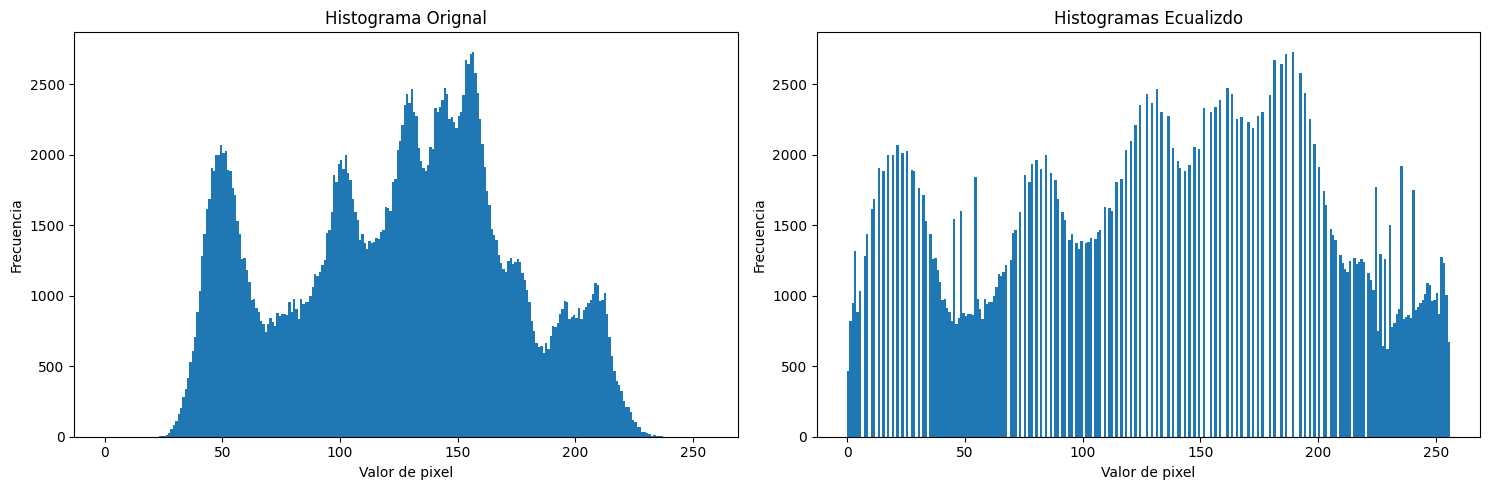

In [76]:
plt.figure(figsize=(15, 8))
plt.subplot(2,4,1)
plt.title('Imagen original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2,4,2)
plt.title('Filtro Gaussinao')
plt.imshow(blurred_image)
plt.axis('off')


plt.subplot(2,4,3)
plt.title('Filtro de promedio')
plt.imshow(average_blur)
plt.axis('off')


plt.subplot(2,4,4)
plt.title('Filto de Mediana')
plt.imshow(median_blur)
plt.axis('off')

plt.subplot(2,4,5)
plt.title('Filto Bilateral')
plt.imshow(bilateral_blur)
plt.axis('off')


plt.subplot(2,4,6)
plt.title('Adjusted')
plt.imshow(adjusted)
plt.axis('off')

plt.subplot(2,4,7)
plt.title('gray')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')


plt.subplot(2,4,8)
plt.title('Equalized')
plt.imshow(equalized)
plt.axis('off')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histograma Orignal')
plt.hist(gray_image.ravel(), 256,[0,256])
plt.xlabel('Valor de pixel')
plt.ylabel('Frecuencia')


plt.subplot(1,2,2)
plt.title('Histogramas Ecualizdo')
plt.hist(equalized.ravel(), 256, [0, 256])
plt.xlabel('Valor de pixel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

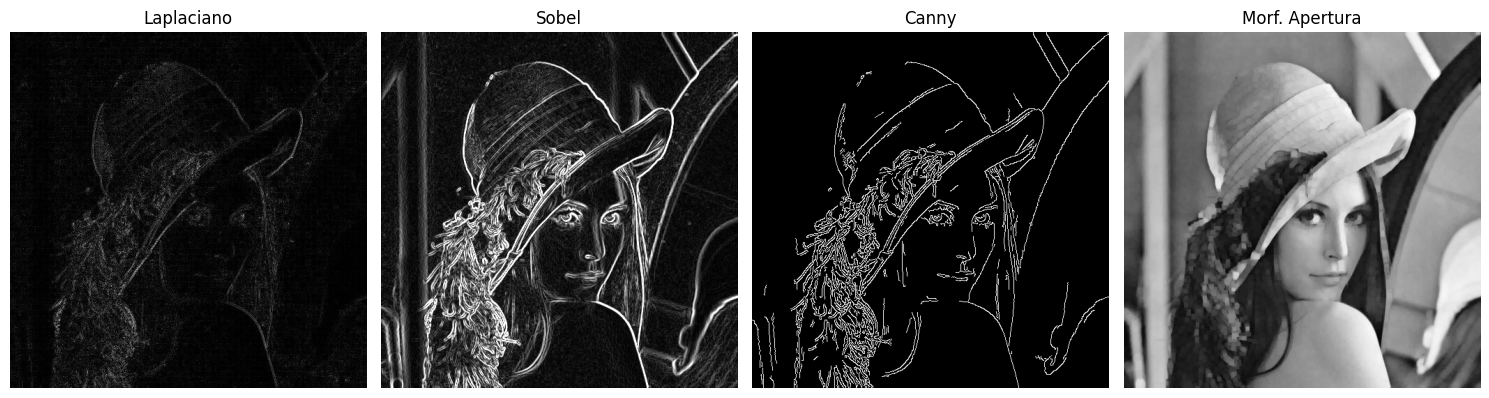

In [77]:
plt.figure(figsize=(15, 8))

plt.subplot(2,4,1)
plt.title('Laplaciano')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.subplot(2,4,2)
plt.title('Sobel')
plt.imshow(sobel, cmap='gray')
plt.axis('off')

plt.subplot(2,4,3)
plt.title('Canny')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2,4,4)
plt.title('Morf. Apertura')
plt.imshow(morph_open, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Laplaciano → Resalta cambios bruscos de intensidad, útil para detección de bordes y detalles finos.

Sobel → Extrae bordes en direcciones X o Y, ayudando a distinguir formas y orientaciones.

Canny → Detecta bordes limpios y continuos, ideal para detección de contornos en objetos.

Morfología (Apertura) → Elimina ruido y resalta estructuras conectadas, mejorando segmentación y máscaras.